In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
np.random.seed(0)

In [4]:
n=15
x=np.linspace(0,10,n)+np.random.randn(n)/5
y=np.sin(x)+x/6+np.random.randn(n)/10

In [5]:
x

array([ 0.35281047,  0.79431716,  1.62431903,  2.59103578,  3.23065446,
        3.375973  ,  4.47573197,  4.96972856,  5.69364194,  6.51069113,
        7.17166586,  8.14799756,  8.72363612,  9.31004929, 10.08877265])

In [6]:
y

array([ 0.43770571,  0.99517935,  1.24877201,  0.98630796,  0.36408873,
        0.07512287, -0.16081   , -0.05233879,  0.3187423 ,  1.53763897,
        1.82595557,  2.31966323,  2.08031157,  1.81942995,  1.21213026])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

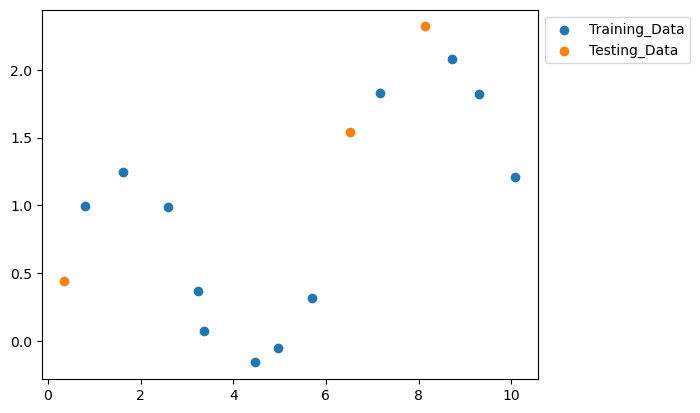

In [9]:
plt.scatter(X_train,y_train,label='Training_Data')
plt.scatter(X_test,y_test,label='Testing_Data')
plt.legend(bbox_to_anchor=(1,1))

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
from sklearn.metrics import r2_score

In [13]:
p=PolynomialFeatures(degree=3)

In [14]:
XT=p.fit_transform(X_train.reshape(-1,1))

In [15]:
XTT=p.transform(X_test.reshape(-1,1))

In [16]:
XT.shape

(12, 4)

In [17]:
l=LinearRegression()

In [18]:
l.fit(XT,y_train)

LinearRegression()

In [19]:
y_pred=l.predict(XTT)

In [20]:
r=r2_score(y_test,y_pred)

In [21]:
r

-1.021534039889715

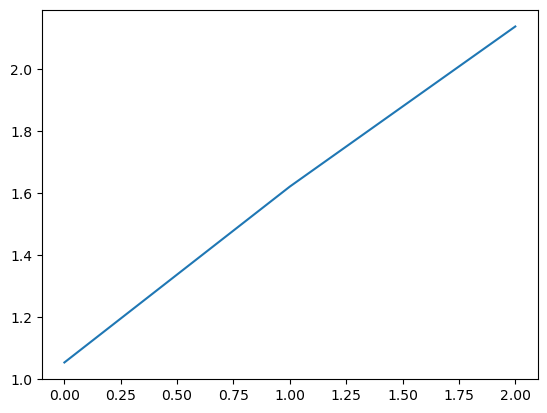

In [22]:
plt.plot(y_pred)

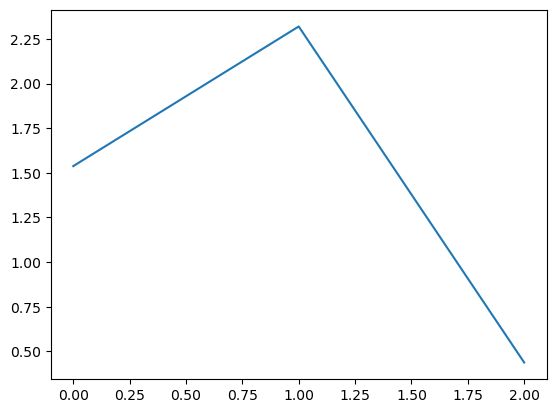

In [23]:
plt.plot(y_test)

In [29]:
pre=[]
l=[1,3,6,9]
for i in l:
    p=PolynomialFeatures(degree=i)
    XT=p.fit_transform(X_train.reshape(-1,1))
    XTT=p.transform(X_test.reshape(-1,1))
    lin=LinearRegression()
    lin.fit(XT,y_train)
    X_T=p.transform(np.linspace(0,10,100).reshape(-1,1))
    y_pred=lin.predict(X_T)
    pre.append(y_pred)
    

In [30]:
pre

[array([0.26418762, 0.27646624, 0.28874487, 0.30102349, 0.31330212,
        0.32558074, 0.33785937, 0.35013799, 0.36241662, 0.37469524,
        0.38697387, 0.39925249, 0.41153112, 0.42380974, 0.43608837,
        0.44836699, 0.46064562, 0.47292424, 0.48520287, 0.49748149,
        0.50976012, 0.52203874, 0.53431737, 0.54659599, 0.55887462,
        0.57115324, 0.58343187, 0.59571049, 0.60798912, 0.62026774,
        0.63254637, 0.644825  , 0.65710362, 0.66938225, 0.68166087,
        0.6939395 , 0.70621812, 0.71849675, 0.73077537, 0.743054  ,
        0.75533262, 0.76761125, 0.77988987, 0.7921685 , 0.80444712,
        0.81672575, 0.82900437, 0.841283  , 0.85356162, 0.86584025,
        0.87811887, 0.8903975 , 0.90267612, 0.91495475, 0.92723337,
        0.939512  , 0.95179062, 0.96406925, 0.97634787, 0.9886265 ,
        1.00090512, 1.01318375, 1.02546238, 1.037741  , 1.05001963,
        1.06229825, 1.07457688, 1.0868555 , 1.09913413, 1.11141275,
        1.12369138, 1.13597   , 1.14824863, 1.16

In [45]:
dpre=np.array(pre)

In [46]:
dpre.shape

(4, 100)

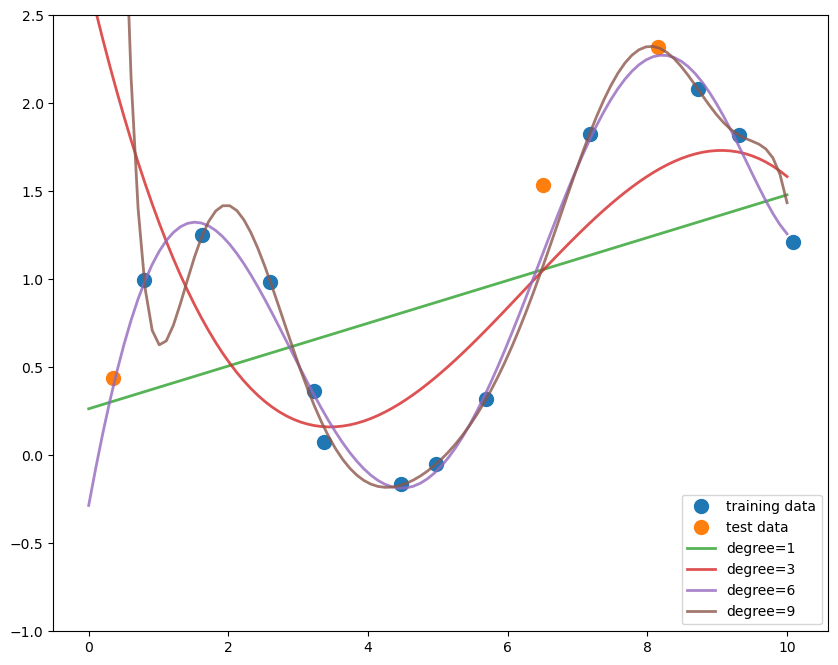

In [47]:
plt.figure(figsize=(10,8))
plt.plot(X_train,y_train,'o',label='training data',markersize=10)
plt.plot(X_test,y_test,'o',label='test data',markersize=10)
for i,d in enumerate([1,3,6,9]):
    plt.plot(np.linspace(0,10,100),dpre[i],alpha=0.8,lw=2,label='degree={}'.format(d))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

In [48]:
from sklearn.metrics import r2_score

In [50]:
r2_train=[]
r2_test=[]
for i in range(0,10):
    p=PolynomialFeatures(degree=i)
    XT=p.fit_transform(X_train.reshape(-1,1))
    XTT=p.transform(X_test.reshape(-1,1))
    l=LinearRegression()
    l.fit(XT,y_train)
    y_pred_train=l.predict(XT)
    y_pred_test=l.predict(XTT)
    r2train=r2_score(y_train,y_pred_train)
    r2test=r2_score(y_test,y_pred_test)
    r2_train.append(r2train)
    r2_test.append(r2test)

In [51]:
r2_train

[0.0,
 0.2307008036735404,
 0.48473584648991475,
 0.6683220027871019,
 0.9216449534869977,
 0.9799218129819142,
 0.9896221148854539,
 0.9918944342120931,
 0.9922846430621652,
 0.9980274799843529]

In [52]:
r2_test

[-0.4873962783865009,
 0.2260149222921468,
 -0.5557780708234423,
 -1.021534039889715,
 0.6332194896844847,
 0.6545286821203588,
 0.9153584491527257,
 0.8142383624777931,
 0.47417661095008146,
 -16.33207824692181]

In [55]:
x=(r2_train,r2_test)

In [56]:
type(x)

tuple

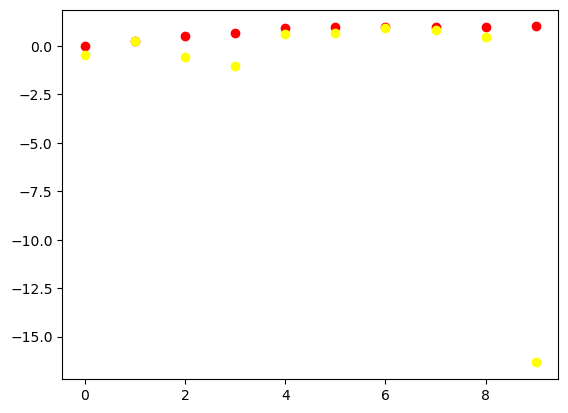

In [63]:
plt.plot(r2_train,'o',color='red')
plt.plot(r2_test,'o',color='yellow')

In [61]:
pd.DataFrame({'Overfitting':9,'Underfitting':0,'Good_Generalization':6},index=[1])

,Overfitting,Underfitting,Good_Generalization
1,9,0,6


In [64]:
x[0]

[0.0,
 0.2307008036735404,
 0.48473584648991475,
 0.6683220027871019,
 0.9216449534869977,
 0.9799218129819142,
 0.9896221148854539,
 0.9918944342120931,
 0.9922846430621652,
 0.9980274799843529]

In [65]:
x[1]

[-0.4873962783865009,
 0.2260149222921468,
 -0.5557780708234423,
 -1.021534039889715,
 0.6332194896844847,
 0.6545286821203588,
 0.9153584491527257,
 0.8142383624777931,
 0.47417661095008146,
 -16.33207824692181]

In [66]:
from sklearn.pipeline import make_pipeline

In [67]:
from sklearn.linear_model import Lasso

In [69]:
model=make_pipeline(PolynomialFeatures(degree=12),Lasso(alpha=0.01,max_iter=10000))

In [71]:
model.fit(X_train.reshape(-1,1),y_train)

G:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.804e-01, tolerance: 6.669e-04
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=12)),
                ('lasso', Lasso(alpha=0.01, max_iter=10000))])

In [73]:
y_pred_lasso=model.predict(X_test.reshape(-1,1))

In [75]:
r2_lasso=r2_score(y_test,y_pred_lasso)

In [76]:
r2_lasso

0.43217526652530647

In [77]:
model2=make_pipeline(PolynomialFeatures(degree=12),LinearRegression())

In [78]:
model2.fit(X_train.reshape(-1,1),y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=12)),
                ('linearregression', LinearRegression())])

In [79]:
y_pred_lr=model2.predict(X_test.reshape(-1,1))

In [81]:
r2_lr=r2_score(y_test,y_pred_lr)

In [82]:
r2_lr

0.10361135788567288

In [83]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\mushrooms.csv")

In [84]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [85]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [87]:
df=pd.get_dummies(df)

In [88]:
df

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [96]:
X=df.iloc[:,2:].values
y=df.iloc[:,1].values.reshape(-1,1)

In [97]:
X

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [98]:
y

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=uint8)

In [99]:
X.shape

(8124, 117)

In [100]:
y.shape

(8124, 1)

In [138]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [102]:
X_train.shape

(6499, 117)

In [103]:
X_test.shape

(1625, 117)

In [104]:
y_train.shape

(6499, 1)

In [105]:
y_test.shape

(1625, 1)

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
from sklearn.tree import plot_tree

In [108]:
dt=DecisionTreeClassifier(random_state=0)

In [109]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [118]:
imp=dt.feature_importances_

In [111]:
names=df.iloc[:,2:].columns

In [113]:
names.shape

(117,)

In [114]:
names

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [117]:
dt.feature_importances_.shape

(117,)

In [120]:
index=np.argsort(imp)[::-1]

In [121]:
index

array([ 27,  53,  55, 100,  25,  22,  71,  63, 109,   7, 105,   1,  36,
        39,  38,  37, 116,  35,  34,  33,  40,  44,  41,  42,  43,  31,
        45,  46,  47,  48,  49,  50,  51,  52,  32,  26,  30,  13,   2,
         3,   4,   5,   6,   8,   9,  10,  11,  12,  14,  29,  15,  16,
        17,  18,  19,  20,  21,  23,  24,  28,  54,  58,  56,  99,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98, 101,  86, 102,
       103, 104, 106, 107, 108, 110, 111, 112, 113, 114,  87,  85,  57,
        70, 115,  59,  60,  61,  62,  64,  65,  66,  67,  68,  69,  72,
        84,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,   0],
      dtype=int64)

In [126]:
l=[]
for i in range(0,5):
    l.append(names[index[i]])

In [127]:
l

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

[Text(0.5882352941176471, 0.9375, 'x[27] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3356, 3143]'),
 Text(0.35294117647058826, 0.8125, 'x[53] <= 0.5\ngini = 0.282\nsamples = 3664\nvalue = [622, 3042]'),
 Text(0.23529411764705882, 0.6875, 'x[55] <= 0.5\ngini = 0.131\nsamples = 3239\nvalue = [228, 3011]'),
 Text(0.17647058823529413, 0.5625, 'x[25] <= 0.5\ngini = 0.046\nsamples = 3083\nvalue = [72, 3011]'),
 Text(0.11764705882352941, 0.4375, 'x[22] <= 0.5\ngini = 0.021\nsamples = 3043\nvalue = [32, 3011]'),
 Text(0.058823529411764705, 0.3125, 'gini = 0.0\nsamples = 3011\nvalue = [0, 3011]'),
 Text(0.17647058823529413, 0.3125, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(0.23529411764705882, 0.4375, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(0.29411764705882354, 0.5625, 'gini = 0.0\nsamples = 156\nvalue = [156, 0]'),
 Text(0.47058823529411764, 0.6875, 'x[71] <= 0.5\ngini = 0.135\nsamples = 425\nvalue = [394, 31]'),
 Text(0.4117647058823529, 0.5625, 'gini = 0.0\nsamples =

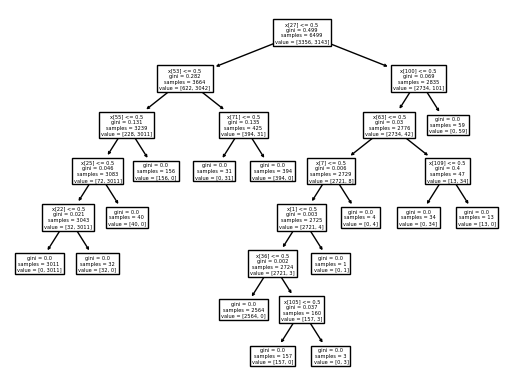

In [129]:
plot_tree(dt)

In [133]:
from sklearn.svm import SVC

In [135]:
from sklearn.model_selection import validation_curve

In [140]:
s=SVC(kernel='rbf',C=1,random_state=0)
p=np.logspace(-4,1,6)

In [141]:
train_score,vaid_score=validation_curve(s,X_train,y_train,param_name='gamma',param_range=p,cv=3,n_jobs=2)

In [142]:
train_score

array([[0.8898892 , 0.8882991 , 0.89291484],
       [0.97183749, 0.97415186, 0.97069005],
       [0.99815328, 0.99907685, 0.99561505],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ]])

In [144]:
vaid_score

array([[0.89155515, 0.89381348, 0.88504155],
       [0.96446701, 0.97137581, 0.97276085],
       [0.9986156 , 0.99815328, 0.99584488],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [0.5163821 , 0.5166205 , 0.51615882]])

In [145]:
l=[]
for i in train_score:
    l.append(i.mean())

In [146]:
l

[0.8903677120699035, 0.9722264664580704, 0.9976150591028489, 1.0, 1.0, 1.0]

In [147]:
l2=[]
for i in vaid_score:
    l2.append(i.mean())

In [148]:
l2

[0.8901367258932961,
 0.9695345541697328,
 0.9975379169594336,
 1.0,
 1.0,
 0.5163871372583776]

In [152]:
len(l2)

6

In [153]:
x=(np.array(l),np.array(l2))

In [154]:
x[0].shape

(6,)

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

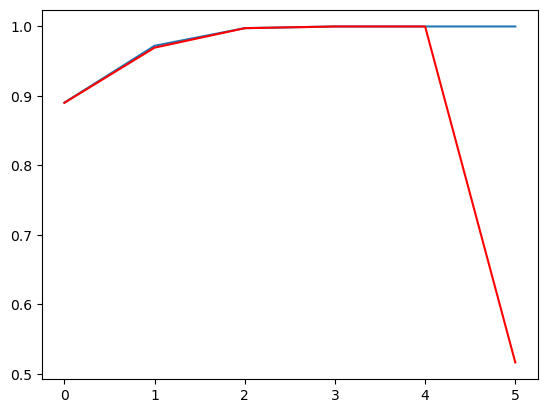

In [156]:
plt.plot(l)
plt.plot(l2,color='red')

In [158]:
pd.DataFrame({'Underfitting':0.0001,'Overfitting':10,'Good_generalization':1},index=[1])

,Underfitting,Overfitting,Good_generalization
1,0.0001,10,1
